In [1]:
import pandas as pd
import re
from datetime import datetime
import missingno as mg
import numpy as np

In [2]:
# Load data
fusion = pd.read_csv('/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/scraping/allocinescraper/allocinescraper/fusionV3.csv', sep= ';')

In [3]:
# Set view settings
pd.set_option('display.max_columns', None)

# View first 5 rows
fusion.head()

,film_id,titre_jpbox,genre_principale,genres,date_sortie_france,date_sortie_usa,duree_minutes,synopsis_x,realisateur,acteurs,pays_origine,budget,box_office_demarrage,box_office_france,recette_usa,recette_monde,image_url,note_moyenne,titre_clean,titre_allocine,film_url,film_image_url,release_date,duration,age_classification,producers,director,top_stars,press_rating,viewer_rating,languages,distributor,year_of_production,film_nationality,filming_secrets,fr_entry_week,us_entry_week,fr_entries,us_entries,awards,associated_genres,press_critics_count,viewer_critics_count,broadcast_category,trailer_views,synopsis_y
0,20941,"Abigail, le pouvoir de l'Elue",Fantasy,NaN,08/01/2020,00/00/0000,51.0,"Un siècle après le début de la Contamination, ...",NaN,NaN,NaN,20 000 000 $,NaN,NaN,- $,1 835 634 $,https://www.jpbox-office.com/cinema/images/pos...,NaN,abigail le pouvoir de lelue,"Abigail, le pouvoir de l'Elue",https://www.allocine.fr/film/fichefilm_gen_cfi...,https://fr.web.img6.acsta.net/c_310_420/pictur...,8 janvier 2020,1h 51min,NaN,"Aleksandr Boguslavskiy,Dmitriy Zhigalov",Aleksandr Boguslavskiy,"Tinatin Dalakishvili,Eddie Marsan,Rinal Mukham...",1.9,1.9,Anglais,Condor Distribution,2019.0,"U.S.A.,Russie",-,NaN,NaN,NaN,NaN,NaN,"Action,Fantastique","241 notes, 40 critiques","241 notes, 40 critiques",en VOD,"47 731,vues","Un siècle après le début de la Contamination, ..."
1,10280,Wolfman,Fantasy,NaN,10/02/2010,12/02/2010,42.0,Lawrence Talbot est un aristocrate torturé que...,Joe Johnston,Emily Blunt | Benicio Del Toro | Anthony Hopki...,NaN,150 000 000 $,214 497,334 885,61 937 495 $,77 810 085 $,https://www.jpbox-office.com/cinema/images/pos...,3.0,wolfman,Wolfman,https://www.allocine.fr/film/fichefilm_gen_cfi...,https://fr.web.img5.acsta.net/c_310_420/medias...,10 février 2010,1h 43min,Interdit - 12 ans,"Joe Johnston,Andrew Kevin Walker,David Self",Joe Johnston,"Benicio Del Toro,Anthony Hopkins,Emily Blunt",3.1,2.4,"Anglais, Roumain",Universal Pictures International France,2010.0,NaN,9 anecdotes,10 au 17 février 2010,12 au 15 février 2010,214 497,30 627 000,1 prix et 2 nominations,"Fantastique,Epouvante-horreur,Thriller",14 critiques,"4274 notes, 791 critiques",en salle,NaN,Lawrence Talbot est un aristocrate torturé que...
2,19775,L'Art du mensonge,Drame,NaN,01/01/2020,15/11/2019,50.0,"Escroc professionnel, Roy Courtnay a déjà en v...",Bill Condon,Ian McKellen | Helen Mirren,NaN,10 000 000 $,66 229,105 205,17 156 058 $,11 200 000 $,https://www.jpbox-office.com/cinema/images/pos...,4.0,lart du mensonge,L'Art du mensonge,https://www.allocine.fr/film/fichefilm_gen_cfi...,https://fr.web.img6.acsta.net/c_310_420/pictur...,1 janvier 2020,1h 50min,NaN,"Bill Condon,Jeffrey Hatcher",Bill Condon,"Helen Mirren,Ian McKellen,Russell Tovey",2.7,3.5,Anglais,Warner Bros. France,2019.0,"U.S.A.,Canada",2 anecdotes,01 au 8 janvier 2020,15 au 18 novembre 2019,66 229,5 605 051,NaN,"Drame,Thriller",16 critiques,"1847 notes, 186 critiques",en salle,NaN,"Escroc professionnel, Roy Courtnay a déjà en v..."
3,11195,Une vie toute neuve,Drame,NaN,06/01/2010,00/00/0000,32.0,"Séoul, 1975. Jinhee a 9 ans. Son père la place...",NaN,NaN,NaN,NaN,16 820,60 220,NaN,NaN,https://www.jpbox-office.com/cinema/images/pos...,3.0,une vie toute neuve,Une vie toute neuve,https://www.allocine.fr/film/fichefilm_gen_cfi...,https://fr.web.img3.acsta.net/c_310_420/medias...,6 janvier 2010,1h 32min,NaN,Ounie Lecomte,Ounie Lecomte,"Kim Sae-Ron,Park Doyeon,Park Myeong-Shin",3.7,3.8,Coréen,Diaphana Films,2008.0,"France,Corée du Sud",1 anecdote,06 au 13 janvier 2010,NaN,16 820,NaN,1 prix et 1 nomination,Drame,19 critiques,"274 notes, 56 critiques",en salle,NaN,"Séoul, 1975. Jinhee a 9 ans. Son père la place..."
4,11019,"New York, I Love You",Court-métrage,NaN,14/04/2010,16/10/2009,40.0,"Depuis l'invention du cinéma, New York n'a jam...",Brett Ratner | Yvan Attal,Bradley Cooper | Orlando Bloom | Andy Garcia |...,NaN,14 700 000 $,39 797,103 782,1 585 787 $,6 427 072 $,https://www.jpbox-office.com/

<Axes: >

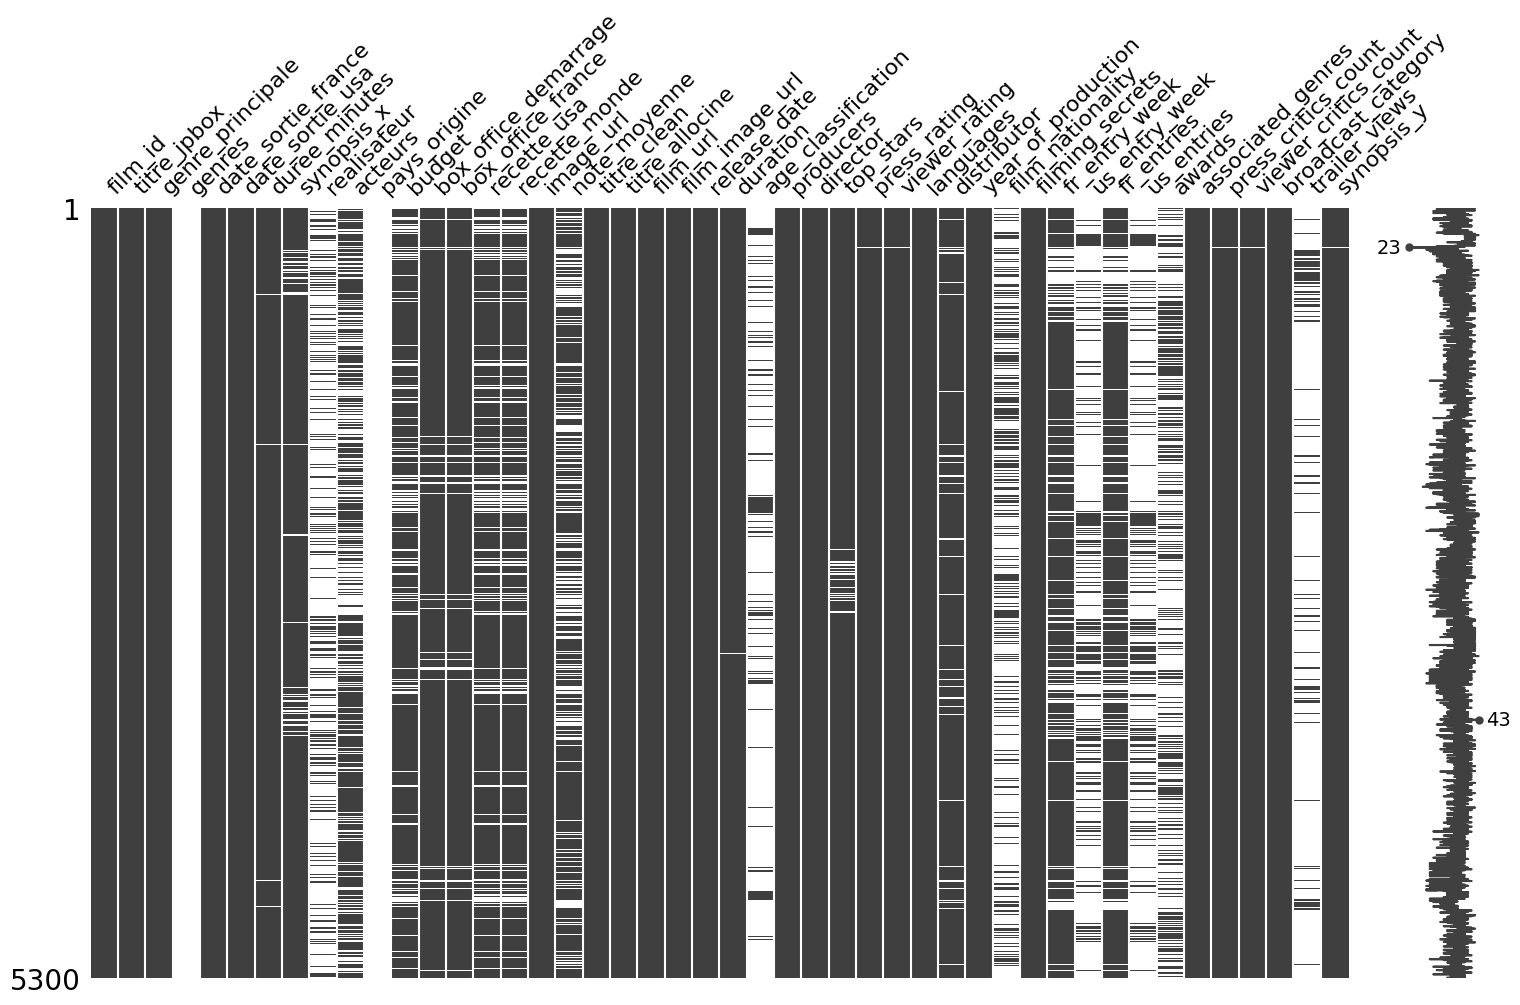

In [4]:
# Visualize missing data
mg.matrix(fusion, figsize=(18, 10))

In [5]:
df_fusion = fusion[[
    'film_id', 'titre_allocine', 'image_url',
    'year_of_production', 'release_date', 'date_sortie_usa',
    'film_nationality', 'languages', 'duration', 'age_classification',
    'director', 'top_stars', 'producers',
    'genre_principale', 'associated_genres', 'synopsis_y', 'filming_secrets', 'awards', 'broadcast_category',
    'distributor',
    'budget', 'box_office_demarrage', 'box_office_france', 'fr_entry_week', 'us_entries', 'us_entry_week', 'recette_usa', 'recette_monde',  
    'press_rating', 'viewer_rating', 'press_critics_count', 'viewer_critics_count', 'trailer_views'
]].copy()

# Rename French or unclear column names
df_fusion.rename(columns={
    'titre_allocine': 'film_title',
    "associated_genres" : 'associated_genres_allocine',
    'genre_principale': 'main_genre_jpboxoffice',
    'release_date': 'release_date_france',
    'us_entries': 'opening_week_us',
    'date_sortie_usa': 'release_date_usa',
    'film_nationality': 'nationality',
    'synopsis_y': 'synopsis',
    'box_office_demarrage': 'opening_week_france',
    'recette_usa': 'revenue_usa',
    'recette_monde': 'revenue_world'
}, inplace=True)

In [6]:
# film_title: remove extra spaces
df_fusion['film_title'] = df_fusion['film_title'].str.strip()

In [ ]:
# Mapping for French month names to numbers
month_mapping = {
    'janvier': '01',
    'février': '02',
    'mars': '03',
    'avril': '04',
    'mai': '05',
    'juin': '06',
    'juillet': '07',
    'août': '08',
    'septembre': '09',
    'octobre': '10',
    'novembre': '11',
    'décembre': '12'
}


def parse_release_date(date_str):

    """
        Parses a French date string and returns it in a standardized format.

        This function handles two common French date formats:
        - Full date: "12 mars 2025" → "12-03-2025"
        - Month and year only: "octobre 2022" → "10-2022"

        If the input does not match either format, contains an unrecognized month,
        or has invalid day/month/year values (e.g., "31 février"), the function returns None.

        Parameters:
        -----------
        date_str : str or NaN
            A date string in French, either as "DD mois YYYY" or "mois YYYY".

        Returns:
        --------
        str or None
            The parsed date string in "DD-MM-YYYY" or "MM-YYYY" format,
            or None if the input is missing or unprocessable.
        """
    
    # Return None if the input is missing (NaN)
    if pd.isna(date_str):
        return None

    # Split the input string into parts (words)
    parts = date_str.strip().split()

    # If the format is "day month year" (3 parts)
    if len(parts) == 3:
        day, month_fr, year = parts

        # Convert French month to numeric format
        month = month_mapping.get(month_fr.lower())

        # Return None if the month is not valid
        if not month:
            return None

        try:
            # Build a datetime object and return the date as "DD-MM-YYYY"
            date_obj = datetime.strptime(f"{day.zfill(2)}-{month}-{year}", "%d-%m-%Y")
            return date_obj.strftime("%d-%m-%Y")
        except ValueError:
            # Handle invalid day/month/year combinations (e.g., "31 février")
            return None

    # If the format is "month year" (2 parts)
    elif len(parts) == 2:
        month_fr, year = parts

        # Convert French month to numeric format
        month = month_mapping.get(month_fr.lower())

        # Return formatted string or None if the month is invalid
        return None if not month else f"{month}-{year}"

    # If the format is not recognized, return None
    else:
        return None
    
# release_date: reformat date
df_fusion['release_date_france'] = df_fusion['release_date_france'].apply(parse_release_date)

In [8]:
# Format 'release_date_usa' to use '-' as separator
df_fusion['release_date_usa'] = df_fusion['release_date_usa'].astype(str).str.replace('/', '-', regex=False)

In [ ]:
def get_season(date_str):
    """
    Determines the meteorological season (Northern Hemisphere) from a given date string.

    Accepts a date string in the format "DD-MM-YYYY" and returns the corresponding season:
    - Winter: December, January, February
    - Spring: March, April, May
    - Summer: June, July, August
    - Autumn: September, October, November

    Parameters:
    -----------
    date_str : str
        A string representing a date in the format "DD-MM-YYYY".

    Returns:
    --------
    str or None
        The season corresponding to the month of the input date,
        or None if the input is invalid or unparseable.
    """

    if pd.isna(date_str):
        return None
    try:
        dt = datetime.strptime(date_str, "%d-%m-%Y")
    except ValueError:
        return None
    month = dt.month
    # Northern hemisphere seasons
    if month in [2, 1, 12]:
        return "Winter"
    elif month in [5, 4, 3]:
        return "Spring"
    elif month in [8, 7, 6]:
        return "Summer"
    else:
        return "Autumn"
    
# Derive season from release_date
df_fusion['release_season'] = df_fusion['release_date_france'].apply(get_season)

In [ ]:
def duration_to_minutes(duration_str):
    """
    Converts a duration string (e.g., "1h 26min") into the total number of minutes.

    The function extracts hours and optional minutes from strings formatted like:
    - "1h"
    - "1h 30min"
    - "2 h 5"
    It handles extra spaces and missing minute values.

    Parameters:
    -----------
    duration_str : str
        A string representing the duration in hours and optional minutes.
        Expected format: "[H]h [M]min" or similar variations.

    Returns:
    --------
    int or None
        Total duration in minutes as an integer, or None if the input is invalid or missing.
    """

    if pd.isna(duration_str):
        return None
    if match := re.search(r'(\d+)\s*h\s*(\d+)?', duration_str):
        hours = int(match.group(1))
        minutes = int(match.group(2)) if match.group(2) else 0
        return hours * 60 + minutes
    return None

# duration: convert to minutes
df_fusion['duration_minutes'] = df_fusion['duration'].apply(duration_to_minutes)

In [11]:
# age_classification: remove extra spaces
df_fusion['age_classification'] = df_fusion['age_classification'].str.strip()

In [ ]:
def split_list(text, separator=','):
    """
    Splits a string into a list of trimmed substrings based on the specified separator.

    This function takes a string, splits it at the specified separator (default is comma),
    trims any leading or trailing whitespace from each substring, and removes empty entries.

    Parameters:
    -----------
    text : str
        The input string to be split. It may contain substrings separated by the given separator.
    
    separator : str, optional (default is ',')
        The character or substring to use as the delimiter for splitting the text.

    Returns:
    --------
    list
        A list of non-empty, trimmed substrings. Returns an empty list if the input is 
        NaN, empty, or contains only whitespace.
    """

    if pd.isna(text) or text.strip() == "":
        return []
    return [x.strip() for x in text.split(separator) if x.strip()]

# producers: split into list and create a producer count column
df_fusion['producers_list'] = df_fusion['producers'].apply(lambda x: split_list(x))
df_fusion['producers_count'] = df_fusion['producers_list'].apply(len)

# top_stars: split into list and create a top_stars count column
df_fusion['top_stars_list'] = df_fusion['top_stars'].apply(lambda x: split_list(x))
df_fusion['top_stars_count'] = df_fusion['top_stars_list'].apply(len)

# language: split into list and create a languages count column
df_fusion['languages_list'] = df_fusion['languages'].apply(lambda x: split_list(x))
df_fusion['languages_count'] = df_fusion['languages_list'].apply(len)

# nationality (film): split into list and create a nationality count column
df_fusion['nationality_list'] = df_fusion['nationality'].apply(lambda x: split_list(x))
df_fusion['nationality_list_count'] = df_fusion['nationality_list'].apply(len)

# associated_genres: keep only count (drop the list version)
df_fusion['associated_genres_allocine_list'] = df_fusion['associated_genres_allocine'].apply(lambda x: split_list(x))
df_fusion['associated_genres_allocine_count'] = df_fusion['associated_genres_allocine_list'].apply(len)

In [12]:
# director: clean spaces
df_fusion['director'] = df_fusion['director'].str.strip()

In [ ]:
def parse_week_period(period_text):
    """
    Extracts the start and end dates from a French week period string and returns a tuple.

    Given a French week period string in the format "DD au DD mois YYYY" (e.g., "05 au 12 mars 2025"),
    this function extracts the start and end dates, formats them as "DD-MM-YYYY", and returns a tuple:
    (formatted_period, iso_week_number). The `formatted_period` is in the format "DD-MM-YYYY – DD-MM-YYYY".
    The `iso_week_number` is the ISO week number of the start date, or None if the conversion fails.

    Parameters:
    -----------
    period_text : str
        The input string representing the week period (e.g., "05 au 12 mars 2025").
    
    Returns:
    --------
    tuple
        A tuple (formatted_period, iso_week_number):
        - formatted_period : str
            The formatted period as "DD-MM-YYYY – DD-MM-YYYY".
        - iso_week_number : int or None
            The ISO week number of the start date, or None if invalid.

    Notes:
    ------
    If the input string doesn't match the expected pattern, the function returns the original
    period_text as the formatted period and None for the ISO week number.
    """

    if pd.isna(period_text) or period_text.strip() == "":
        return None, None

    # Pattern expecting something like: "05 au 12 mars 2025"
    pattern = r'(\d{1,2})\s*au\s*(\d{1,2})\s*(\w+)\s*(\d{4})'
    match = re.search(pattern, period_text.strip(), re.IGNORECASE)
    if not match:
        return period_text, None

    start_day, end_day, month_fr, year = match.groups()
    month = month_mapping.get(month_fr.lower(), '01')

    # Format dates with hyphens
    start_date_str = f"{start_day.zfill(2)}-{month}-{year}"
    end_date_str = f"{end_day.zfill(2)}-{month}-{year}"

    # Determine ISO week number using the start date
    try:
        dt_start = datetime.strptime(f"{year}-{month}-{start_day.zfill(2)}", "%Y-%m-%d")
        iso_week = dt_start.isocalendar()[1]
    except Exception:
        iso_week = None

    formatted_period = f"{start_date_str} – {end_date_str}"
    return formatted_period, iso_week

# Process week periods for fr_entry_week and us_entry_week
for col in ['fr_entry_week', 'us_entry_week']:
    period, iso_week = zip(*df_fusion[col].apply(lambda x: parse_week_period(x)))
    df_fusion[f'{col}'] = period
    df_fusion[f'{col}_iso_week'] = [int(i) if pd.notna(i) else 0 for i in iso_week]

In [ ]:
def extract_number(text):
    """
    Extracts the first number from a string, handling spaces and non-numeric characters.

    This function removes any spaces from the input string and attempts to convert the 
    cleaned string into an integer. If the conversion fails, it searches for the first
    sequence of digits and returns it as an integer.

    Parameters:
    -----------
    text : str
        The input string from which a number needs to be extracted.
    
    Returns:
    --------
    int or None
        The extracted number as an integer, or None if no valid number is found.

    Notes:
    ------
    If the input string is missing (NaN) or contains no digits, the function returns None.
    If the string contains non-numeric characters, the function will attempt to extract
    the first sequence of digits.
    """

    if pd.isna(text):
        return None
    cleaned = text.replace(" ", "")
    try:
        return int(cleaned)
    except ValueError:
        # Fallback: extract the first sequence of digits if conversion fails
        import re
        match = re.search(r'(\d+)', cleaned)
        return int(match.group(1)) if match else None

# filming_secrets: extract number and cast to int (if missing, set to 0)
df_fusion['filming_secrets_num'] = df_fusion['filming_secrets'].apply(lambda x: extract_number(x))
df_fusion['filming_secrets_num'] = df_fusion['filming_secrets_num'].apply(lambda x: int(x) if pd.notna(x) else 0)

# Process fr_entries and us_entries as numbers (remove spaces and cast to int)
for col in ['opening_week_france', 'opening_week_us']:
    df_fusion[f'{col}_num'] = df_fusion[col].apply(lambda x: extract_number(x))
    df_fusion[f'{col}_num'] = df_fusion[f'{col}_num'].apply(lambda x: int(x) if pd.notna(x) else 0)

# press_critics_count: extract number and cast to int
df_fusion['press_critics_count_num'] = df_fusion['press_critics_count'].apply(lambda x: extract_number(x))
df_fusion['press_critics_count_num'] = df_fusion['press_critics_count_num'].apply(lambda x: int(x) if pd.notna(x) else 0)

In [ ]:
def clean_awards(text):
    """
    Extracts the number of awards and nominations from a string describing them.

    This function looks for phrases like "1 prix et 1 nomination" or "20 nominations" 
    and extracts the count of awards (prix) and nominations (nomination). If the input 
    string is missing (NaN) or empty, or if the awards or nominations are not present, 
    it returns None for the respective values.

    Parameters:
    -----------
    text : str
        The input string containing the information about awards and nominations.

    Returns:
    --------
    tuple of (int or None, int or None)
        The number of awards and nominations as integers, or None if not found.

    Notes:
    ------
    - The function expects the words "prix" and "nomination" to indicate awards and nominations respectively.
    - Only the first occurrence of "prix" and "nomination" is considered.
    - If the string is missing or has no recognizable number, the function returns None for that field.
    """

    awards = None
    nominations = None
    if pd.isna(text) or text.strip() == "":
        return awards, nominations
    match_awards = re.search(r'(\d+)\s*prix', text, re.IGNORECASE)
    match_nominations = re.search(r'(\d+)\s*nomination', text, re.IGNORECASE)
    if match_awards:
        awards = int(match_awards.group(1))
    if match_nominations:
        nominations = int(match_nominations.group(1))
    return awards, nominations

# awards: separate awards and nominations and cast to int (defaulting to 0)
awards_data = df_fusion['awards'].apply(clean_awards)
df_fusion['award_count'] = awards_data.apply(lambda x: int(x[0]) if pd.notna(x[0]) else 0)
df_fusion['nomination_count'] = awards_data.apply(lambda x: int(x[1]) if pd.notna(x[1]) else 0)

# Create total awards+nomination column, as int
df_fusion['total_awards_nomination'] = df_fusion.apply(lambda row: int(row['award_count']) + int(row['nomination_count']), axis=1)

In [ ]:
def clean_viewer_critics(text):
    """
    Extracts the number of viewer ratings (notes) and critic reviews (critiques) from a string.

    This function parses strings like "566 notes, 241 critiques" and returns a tuple containing 
    the number of viewer ratings and critic reviews as integers. If the input string is missing 
    (NaN), empty, or does not contain the expected format, it returns None for the respective fields.

    Parameters:
    -----------
    text : str
        The input string containing the number of viewer ratings and critic reviews.

    Returns:
    --------
    tuple of (int or None, int or None)
        A tuple containing the number of viewer ratings (notes) and critic reviews (critiques). 
        Returns None if the respective value is not found or if the input is invalid.

    Notes:
    ------
    - The function assumes that the words "notes" and "critiques" are used to represent viewer ratings and critic reviews respectively.
    - Only the first occurrence of "notes" and "critiques" is considered.
    - If either value is missing or cannot be parsed, it returns None for that field.
    """

    notes = None
    critiques = None
    if pd.isna(text) or text.strip()=="":
        return notes, critiques
    match_notes = re.search(r'(\d+)\s*notes', text, re.IGNORECASE)
    match_critiques = re.search(r'(\d+)\s*critiques', text, re.IGNORECASE)
    if match_notes:
        notes = int(match_notes.group(1))
    if match_critiques:
        critiques = int(match_critiques.group(1))
    return notes, critiques

# viewer_critics_count: split into notes and critiques and cast them to int
viewer_data = df_fusion['viewer_critics_count'].apply(clean_viewer_critics)
df_fusion['viewer_notes'] = viewer_data.apply(lambda x: int(x[0]) if pd.notna(x[0]) else 0)
df_fusion['viewer_critiques'] = viewer_data.apply(lambda x: int(x[1]) if pd.notna(x[1]) else 0)

In [ ]:
def extract_trailer_views_count(text):
    """
    Extracts the integer view count from a string representing trailer views, 
    handling non-breaking spaces, commas, and non-numeric characters.

    This function parses strings like "30 556,vues" and returns the view count as an integer (30556).
    Non-numeric characters, spaces, and commas are removed during the extraction process.
    If the input is missing, empty, or cannot be cleaned into a valid number, it returns pd.NA.

    Parameters:
    -----------
    text : str or NaN
        The input string containing the trailer view count. It may include non-numeric characters like spaces, commas, or words.

    Returns:
    --------
    int or pd.NA
        The extracted view count as an integer. If the input is invalid or cannot be parsed into a number, returns pd.NA.

    Example:
    --------
    extract_trailer_views_count("30 556,vues")  -> 30556
    extract_trailer_views_count("No views yet") -> pd.NA
    """

    if pd.isna(text):
        return pd.NA
    cleaned = re.sub(r"[^\d]", "", str(text))
    return int(cleaned) if cleaned else pd.NA

# trailer_views: extract number of views
df_fusion['trailer_views_num'] = df_fusion['trailer_views'].apply(extract_trailer_views_count)

In [18]:
# synopsis: add a column for the length of the synopsis
df_fusion['synopsis_length'] = df_fusion['synopsis'].apply(lambda x: len(x) if pd.notna(x) else 0)

In [ ]:
def extract_year(val):
    """
    Extracts the year from a given value, which could be a string, datetime object, or float.
    If the value is not recognized or cannot be converted to a valid year, returns np.nan or pd.NA.

    This function handles:
    - Datetime objects: Returns the year.
    - Floats: Returns the integer part of the float as the year.
    - Strings: Attempts to convert the string to a datetime and extract the year.
    - Invalid or unrecognized values: Returns np.nan.

    Parameters:
    -----------
    val : str, datetime, float, or NaN
        The input value which can be a string, datetime object, float, or NaN.

    Returns:
    --------
    int or pd.NA or np.nan
        The extracted year as an integer. If the input is invalid, returns np.nan or pd.NA.
    
    Example:
    --------
    extract_year("2023-05-12") -> 2023
    extract_year(pd.Timestamp("2023-05-12")) -> 2023
    extract_year(2023.0) -> 2023
    extract_year("Invalid date") -> np.nan
    extract_year(None) -> np.nan
    """

    if pd.isna(val):
        return np.nan
    if isinstance(val, datetime):
        return val.year
    if isinstance(val, float):
        return int(val) if not pd.isna(val) else pd.NA
    if isinstance(val, str):
        try:
            return pd.to_datetime(val).year
        except Exception:
            return np.nan
    return np.nan  # fallback for unexpected types

    
# Process year_of_production: extract year and cast to Int64
df_fusion['year_of_production'] = df_fusion['year_of_production'].apply(extract_year).astype('Int64')

In [20]:
# press_critics_count: extract number and cast to int
df_fusion['press_critics_count_num'] = df_fusion['press_critics_count'].apply(lambda x: extract_number(x))
df_fusion['press_critics_count_num'] = df_fusion['press_critics_count_num'].apply(lambda x: int(x) if pd.notna(x) else 0)

In [28]:
def clean_currency(value, to_currency="EUR", usd_to_eur=0.9):
    """
    Cleans and converts currency values (like '17 156 058 $' or '5 834 380 €') to float.
    Converts USD to EUR if needed.

    Parameters:
    - value: str or float
    - to_currency: 'EUR' or 'USD'
    - usd_to_eur: conversion rate (default 0.9)

    Returns:
    - float or np.nan
    """
    if pd.isna(value) or value in ["-", "NaN", "nan", "", "? $", "? €", "?"]:
        return np.nan

    value = str(value).strip()

    # Currency detection
    if "€" in value:
        currency = "EUR"
    elif "$" in value:
        currency = "USD"
    else:
        # If currency can't be detected, treat as unknown
        return np.nan

    # Remove symbols and whitespace
    cleaned = value.replace("€", "").replace("$", "").replace(" ", "").replace(",", ".")

    try:
        amount = float(cleaned)
    except ValueError:
        return np.nan

    # Convert if necessary
    if to_currency == "EUR" and currency == "USD":
        amount *= usd_to_eur
    elif to_currency == "USD" and currency == "EUR":
        amount /= usd_to_eur

    return amount

# Apply cleaning to a new column
df_fusion['budget'] = df_fusion['budget'].apply(lambda x: clean_currency(x, to_currency="EUR"))
df_fusion['revenue_usa'] = df_fusion['revenue_usa'].apply(lambda x: clean_currency(x, to_currency="EUR"))
df_fusion['revenue_world'] = df_fusion['revenue_world'].apply(lambda x: clean_currency(x, to_currency="EUR"))

In [31]:
# Convert to numeric (float), replacing invalid values with NaN
df_fusion['trailer_views_num'] = pd.to_numeric(df_fusion['trailer_views_num'], errors='coerce')

In [ ]:
# Update the details of the film with 'film_id' == 1407
df_fusion.loc[df_fusion['film_id'] == 1407, 
                          ['year_of_production', 
                           'release_date_france', 
                           'release_date_us', 
                           'duration', 
                           'distributor', 
                           'duration_minutes', 
                           'top_stars']] = [
                               2016, 
                               '13-04-2016', 
                               '15-04-2016', 
                               '1hr 46mins', 
                               'Walt Disney Studios Motion Pictures',
                                106, 
                                'Neel Sethi,Bill Murray,Ben Kingsley,']

In [33]:
# Rename speficific columns
df_fusion.rename(columns={
    'opening_week_france': 'fr_entries',
    'opening_week_us' : 'us_entries',
    'box_office_france' : 'fr_entries_cumul'
}, inplace=True)

In [34]:
if __name__ == '__main__':
    output_path = '/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/machine_learning/fusionV3_cleaned.csv'
    
    df_fusion.to_csv(output_path, index=False)
    print(f"Cleaned data saved to {output_path}")

Cleaned data saved to /Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/machine_learning/fusionV3_cleaned.csv
